<a href="https://colab.research.google.com/github/raulbenitez/DAPR/blob/master/MDS_TSNE_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Generate multidimensional data distributed in a certain number of blobs

The parameter centers indicates the number of blobs and the parameter n_features the dimensionality of the feature space

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=5,random_state=0)

# 2. Visualize the data in 2d by projecting the observations using MDS and t-SNE

In [9]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances

# MDS:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=21,
                   dissimilarity="precomputed", n_jobs=1)
similarities = euclidean_distances(X)
pos_mds = mds.fit(similarities).embedding_

# T-SNE:

# Apply t-SNE algorithm:
tsne = manifold.TSNE(n_components=2, init='random', random_state=21, perplexity=30)
pos_tsne = tsne.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [10]:
pos_mds.shape

(100, 2)

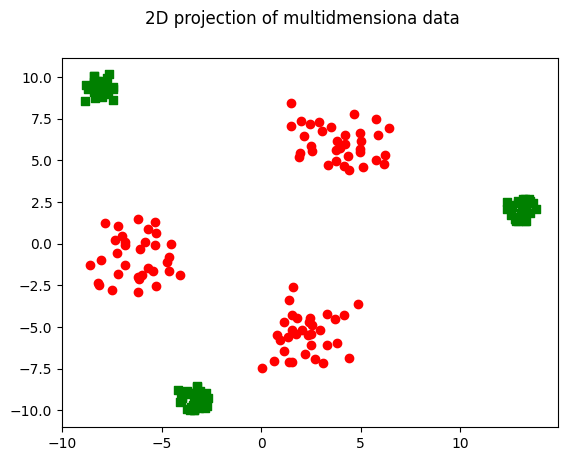

In [11]:
import pylab as py

# Represent data in the 2D MDS projection:
fig1 = py.figure()
py.scatter(pos_mds[:,0],pos_mds[:,1],marker='o',c='r')
py.scatter(pos_tsne[:,0],pos_tsne[:,1],marker='s',c='g')
fig1.suptitle('2D projection of multidmensiona data')
py.show()

# 3. Check how each method handles clusters with different dispersions

Let's add a parameter cluster_std specifying the dispersion of the clusters


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


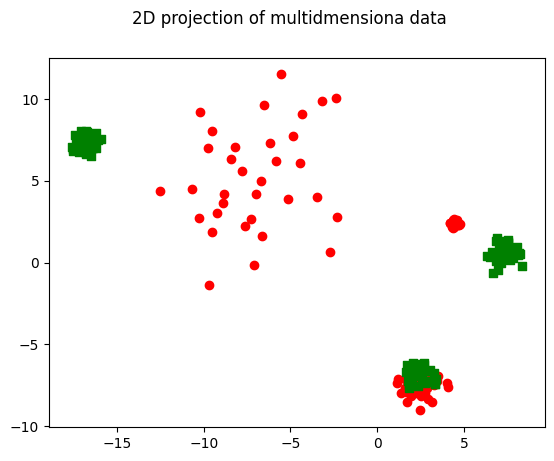

In [16]:
X, y = make_blobs(n_samples=100, centers=3, n_features=5,cluster_std = [0.1,0.5,2])

# MDS:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=21,
                   dissimilarity="precomputed", n_jobs=1)
similarities = euclidean_distances(X)
pos_mds = mds.fit(similarities).embedding_
# T-SNE:
# Apply t-SNE algorithm:
tsne = manifold.TSNE(n_components=2, init='random', random_state=21, perplexity=30)
pos_tsne = tsne.fit_transform(X)


fig1 = py.figure()
py.scatter(pos_mds[:,0],pos_mds[:,1],marker='o',c='r')
py.scatter(pos_tsne[:,0],pos_tsne[:,1],marker='s',c='g')
fig1.suptitle('2D projection of multidmensiona data')
py.show()

The MDS projection respects the different dispersions of the clusters